# Part 1

In [1]:
import pandas as pd
import numpy as np
np.random.seed(2021)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

num_stocks = 50 # number of stocks to use in the simulation

In [2]:
xls = pd.ExcelFile("Assignment_3_Data.xlsx")
df1 = pd.read_excel(xls, 'Firm Characteristics',skiprows=6,header=1) # Corporate/Financial Characteristics
df2 = pd.read_excel(xls, 'Aggregates',skiprows=7,header=1) # Aggregate summary data
df3 = pd.read_excel(xls, 'Stock Prices',header=1) # This is the time series data


In [3]:
# Add ticker info 
dates = df3["Date"]
df1["Ticker"] = df1.apply(lambda row: row["Exchange:Ticker"].split(":")[-1], axis=1)


In [4]:
df1.head()

,Company Name,Exchange:Ticker,Security Tickers,P/BV [Latest] (x),P/TangBV [Latest] (x),TEV/LTM EBITDA [My Setting] [Latest] (x),P/LTM Normalized EPS [Latest] (x),Forward P/E - Capital IQ [NTM] (x),PEG Ratio - Capital IQ [NTM] (x),Return on Assets % [LTM],Return on Equity % [LTM],EBIT Margin % [LTM],"Total Revenues, 3 Yr CAGR % [LTM] (%)","Net Income, 3 Yr CAGR % [LTM] (%)",S&P Entity Credit Rating - Issuer Credit Rating - Local Currency LT [Latest] (Rating),"Market Capitalization [My Setting] [Latest] ($USDmm, Historical rate)",Dividend Yield [Latest] (%),12M Realized Price Volatility (Universe: S&P 500) (Cross Sectional Rank),Current Ratio [Latest Quarter],Ticker
0,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)",NasdaqGS:FLWS,NasdaqGS:FLWS; DB:FWC,2.25,4.01,7.43,25.5,20.9,1.1,5.49,16.8,3.88,16.4,42,-,632.6,-,-,2.06,FLWS
1,1st Source Corporation (NasdaqGS:SRCE),NasdaqGS:SRCE,NasdaqGS:SRCE,1.93,2.19,-,21.7,19,1.9,1.16,9.46,-,5.3,4.76,-,1369.9,1.44,-,-,SRCE
2,"2U, Inc. (NasdaqGS:TWOU)",NasdaqGS:TWOU,NasdaqGS:TWOU; DB:2U1,15.7,19.5,NM,NM,NM,-,-5.8,-12.6,-9.86,35.4,-,-,3261.8,-,-,3.28,TWOU
3,3D Systems Corporation (NYSE:DDD),NYSE:DDD,NYSE:DDD; XTRA:SYV; DB:SYV; BMV:DDD *; SWX:DDD,2.03,4.27,36.1,NM,21.4,0.891,-2,-5.2,-4.41,2.66,-,-,1313.3,-,-,2.93,DDD
4,3M Company (NYSE:MMM),NYSE:MMM,NYSE:MMM; XTRA:MMM; BASE:MMM; WBAG:MMM; BOVESP...,11.5,173.5,17.2,32.8,25.1,2.34,13,45.4,23.3,-0.716,4,AA-,140085.1,2,95,2.07,MMM


In [5]:
df3.dropna(axis="columns", inplace=True)
df3 = df3.apply(pd.to_numeric, errors='coerce').dropna(axis="columns")

In [6]:
sample = df3.drop(["Date", "IWV"], axis=1).iloc[:1258,:].sample(n=num_stocks, axis=1) # Don't need the date and IWV columns
sample.head(10)

,JW.A,AN,THG,INTL,CTSH,CMCS.A,PODD,UMBF,CMI,BH,...,KND,RRD,NTGR,ASGN,CLDT,ATRI,MED,VRNT,BWA,GXP
0,39.76468,35.70,30.36332,24.37,32.71372,11.07783,19.06,34.87081,79.32695,322.39934,...,9.65305,14.73448,35.51,11.02,8.19554,217.25698,14.05819,28.18,31.13114,17.27468
1,38.93661,33.26,30.00010,24.16,32.83568,11.18411,19.09,34.83448,80.41601,330.05115,...,9.23947,14.77354,34.69,11.05,8.09245,215.36072,13.92628,27.60,31.41186,17.07409
2,39.62373,34.05,29.96551,24.18,33.49523,11.28360,19.12,35.79731,82.50700,329.91359,...,9.83784,14.64660,35.14,11.09,8.09981,217.12153,14.09588,27.36,31.44992,17.10619
3,39.91443,33.44,29.63688,24.03,33.05718,11.16375,18.74,35.51573,81.48764,322.04684,...,9.84664,14.42202,35.70,11.08,8.14400,215.81221,14.47277,27.48,30.98364,17.07409
4,39.22732,33.80,29.95686,24.27,33.17167,11.40119,18.26,36.17881,83.82258,325.66641,...,9.60905,14.19744,37.56,11.02,8.12927,214.90020,14.32202,27.10,30.62204,17.13828
5,39.29779,34.34,30.78707,24.62,34.72473,11.48711,18.16,36.72381,86.01812,328.12530,...,9.77624,14.27556,37.66,11.20,8.23972,218.20510,14.78371,27.77,34.37605,17.33085
6,39.62373,34.35,30.96868,24.63,34.98357,11.49616,18.99,36.74197,85.87872,326.66372,...,9.48586,14.39273,37.92,11.30,8.30599,218.31346,14.86851,26.90,34.50927,17.28271
7,39.43874,34.39,31.24542,24.82,34.40118,11.53234,19.04,37.06897,86.45374,328.16829,...,9.23947,14.38296,38.43,11.30,8.44590,219.55054,14.95331,26.84,35.19441,17.28271
8,39.28017,34.10,30.78707,24.84,34.01789,11.47807,19.11,36.66931,85.17301,328.16829,...,8.97549,14.07050,37.53,11.16,8.38699,214.97244,14.55757,26.52,35.06595,17.21049
9,38.31997,34.28,30.77843,24.48,34.06269,11.54817,19.17,35.96081,86.47117,324.76366,...,9.05468,11.84422,37.27,11.11,8.38699,215.92960,15.04754,27.42,34.99458,17.19445


In [7]:
returns_all = df3.drop(["Date"], axis=1).iloc[:1258, :].reset_index(drop=True).astype(float).pct_change()
returns_all = returns_all.iloc[1:, :] # all but first row, because we can't get the returns of the first day
mean_returns_all = returns_all.mean() # Average DAILY returns 
cov_matrix_all = returns_all.cov() # Average DAILY covariance 

In [8]:
returns = sample.reset_index(drop=True).astype(float).pct_change(1)
returns = returns.iloc[1:, :] # all but first row, because we can't get the returns of the first day
mean_returns = returns.mean() # Average DAILY returns 
cov_matrix = returns.cov() # Average DAILY covariance 

In [9]:
# Annualize the data
mu_all = (1 + mean_returns_all) ** 252 - 1
sigma_all = 252 * cov_matrix_all  # Annualize the covariance matrix. Sigma so we have to sqrt
var_all = pd.Series(np.diag(sigma_all), index=[sigma_all.index, sigma_all.columns])

mu = (1 + mean_returns) ** 252 - 1
sigma = 252 * cov_matrix 

n = mu.size # This is a 1D array
risk_free_rate = 0.0085 # On December 31st, 2016 1yr treasury note yield was 0.85%

In [10]:
def calculate_beta(returns_asset, returns_benchmark, variance_benchmark):
    return(np.cov(returns_asset, returns_benchmark) / variance_benchmark)

In [11]:
var_IWV = float(var_all["IWV"])
returns_IWV = returns_all["IWV"].reset_index(drop=True, inplace=True)
betas = returns.apply(lambda x:  calculate_beta(x, returns_IWV, var_IWV), axis=0)

In [12]:
# Generate random portfolios
def mu_portfolio(w: pd.DataFrame, mu: pd.DataFrame) -> float:
    return(w.T @ mu)

def sigma_portfolio(w: pd.DataFrame, sigma: pd.DataFrame) -> float:
    return(np.sqrt(w.T @ sigma @ w)) # Sqrt because it's variance

def beta_portfolio(w: pd.DataFrame, betas: pd.DataFrame) -> float:
    return(w.T @ betas)

def generate_random_portfolio(mu: pd.DataFrame, sigma: pd.DataFrame) -> dict:
    w = np.empty(0)
    for _ in range(len(mu)):
        w = np.append(w, np.random.uniform(0, 1))
    w = w / np.sum(w) # Make sure the sum of the weights is 1
    assert(np.isclose(np.sum(w), 1))
    w = np.random.permutation(w) # Shuffle the weights
    mu0 = mu_portfolio(w, mu)
    sigma0 = sigma_portfolio(w, sigma)
    beta0 = beta_portfolio(w, betas)
    return({"w": w, "mu": mu0, "sigma": sigma0, "beta" : beta0})

In [13]:
# Now we can generate a bunch of random portfolios
num_simulations = 10000
random_portfolios = [generate_random_portfolio(mu, sigma) for _ in range(num_simulations)]

<AxesSubplot:xlabel='Standard Deviation', ylabel='Expected Return'>

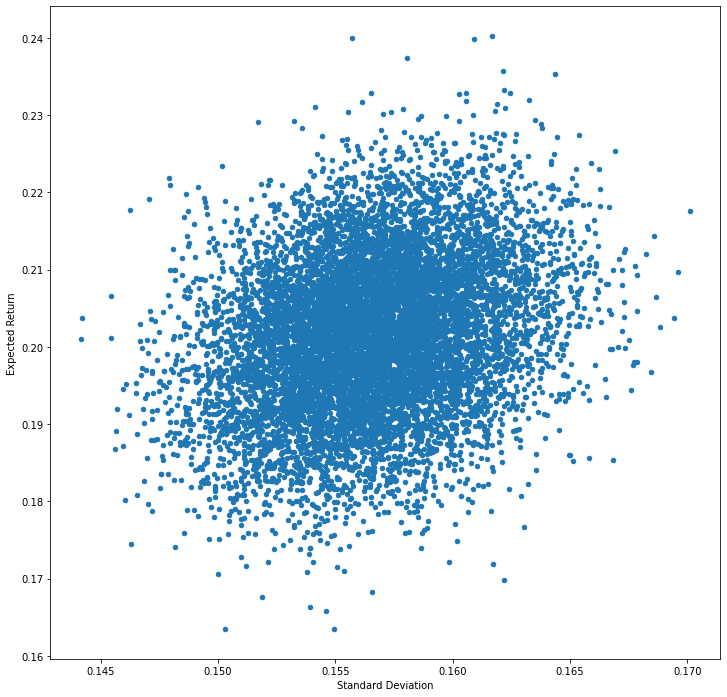

In [14]:
portfolio_df = pd.DataFrame(random_portfolios)
portfolio_df["Sharpe Ratio"] = portfolio_df.apply(lambda x : (x["mu"] - risk_free_rate) / x["sigma"], axis=1)
portfolio_df["Treynor Ratio"] = portfolio_df.apply(lambda x : (x["mu"] -  risk_free_rate) / x["beta"], axis=1)

portfolio_df.plot(x="sigma", y="mu", kind="scatter", ylabel="Expected Return", xlabel="Standard Deviation")

In [16]:
portfolio_df.sort_values(by="Sharpe Ratio", ascending=False, inplace=True)
portfolio_df.head(10)

,w,mu,sigma,beta,Sharpe Ratio,Treynor Ratio
3180,"[0.017045291131730703, 0.015795008654291953, 0...",0.239999,0.155718,0.021268,1.486655,10.884620
3588,"[0.019800938395379716, 0.010418532345422617, 0...",0.229156,0.151708,0.020280,1.454480,10.880435
2365,"[0.02497638391558127, 0.0005521487008535433, 0...",0.237403,0.158077,0.023176,1.448045,9.876874
8425,"[0.016270670526298072, 0.008776126494978703, 0...",0.231035,0.154144,0.022994,1.443685,9.677824
7181,"[0.04586889435700302, 0.006264901333284577, 0....",0.221883,0.147899,0.021027,1.442754,10.147795
8124,"[0.034675480676713805, 0.036760631963032905, 0...",0.229216,0.153265,0.019515,1.440099,11.309912
7179,"[0.006296820307725295, 0.041898457592540427, 0...",0.239876,0.160904,0.021188,1.437977,10.920275
5036,"[0.03357515160810184, 0.01425087666278608, 0.0...",0.220977,0.147965,0.020586,1.435993,10.321333
2110,"[0.03358001518400408, 0.011858858875267721, 0....",0.232917,0.156530,0.021271,1.433700,10.550425
5078,"[0.012053530826497787, 0.0069567009052658646, ...",0.240226,0.161667,0.024939,1.433357,9.291640


In [17]:
d1 = {}
for i in range(len(portfolio_df["w"][0])):
    d1[sample.columns[i]] = portfolio_df["w"][0][i] # Get the weights of the optimal portfolio

d1_avg_return = portfolio_df["mu"][0]
dict(list(d1.items())[:10])

{'JW.A': 0.023517342184116816,
 'AN': 0.002791540760763295,
 'THG': 0.03031804931811804,
 'INTL': 0.029857124440664545,
 'CTSH': 0.010326263680423307,
 'CMCS.A': 0.039436914107365544,
 'PODD': 0.007547789072115561,
 'UMBF': 0.006430270388513889,
 'CMI': 0.009896982882385264,
 'BH': 0.011579213176895893}

# Part 2

In [18]:
def calculate_zscore(row, metric_name, portofolio_mu, portfolio_sigma):
    return((row[metric_name] - portofolio_mu) / portfolio_sigma)

In [19]:
# mean_pbv = float(df2["P/BV [Latest] (x)"].iloc[[1]])
# sd_pbv = float(df2["P/BV [Latest] (x)"].iloc[[4]])
# z_score_pbv = -(df2["P/BV [Latest] (x)"] - mean_pbv) / sd_pbv

In [20]:
sample_2 = df1.sample(n=num_stocks)

In [21]:
# Calculate all the Z-Scores
cols = sample_2.columns[3:]
cols = list(cols)
cols.remove("Ticker")
for col in cols:
    sample_2[col] = sample_2[col].apply(pd.to_numeric, errors='coerce')
    metric_mu = sample_2[col].mean()
    metric_sd = sample_2[col].std()
    sample_2["Z-Score " + col] = sample_2.apply(lambda row: calculate_zscore(row, col, metric_mu, metric_sd), axis=1)

In [22]:
# Make a heuristic value score based on summing all the Z-Scores
def calculate_value_score(row, cols):
    return(np.sum(row["Z-Score " + col] for col in cols))

In [23]:
# Construct Portfolio
# We assume that all Z-Scores are evenly valuable 
sample_2.fillna(0, inplace=True)
sample_2["Average Score"] = sample_2.apply(lambda row: calculate_value_score(row, cols) / len(cols), axis=1)

min_score = sample_2["Average Score"].min()


# Scale the score to generate the weights
sample_2["Average Score"] = sample_2["Average Score"] - min_score


/var/folders/s4/kp5y4dr14d19trtzc9ydqxvm0000gn/T/ipykernel_46765/663119225.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return(np.sum(row["Z-Score " + col] for col in cols))


In [24]:
# Generate Weights
sum_scores = sum(sample_2["Average Score"])
sample_2["Weights"] = sample_2.apply(lambda row: row["Average Score"] / sum_scores, axis=1)

In [31]:
weights = list(sample_2["Weights"])
tickers = list(sample_2["Ticker"])
d2 = {}
for i in range(len(tickers)):
    d2[tickers[i]] = weights[i]
d2_avg_return = returns_all["IWV"].mean()
dict(list(d2.items())[:10])

{'EXPR': 0.005611741703278925,
 'CELG': 0.027116411337560764,
 'STAA': 0.03392298608087469,
 'ITIC': 0.014595357345783733,
 'JPM': 0.03260753979558076,
 'MKTX': 0.03755592596504451,
 'PSA': 0.02899321735431615,
 'MNOV': 0.023699693490769443,
 'NR': 0.014751427112153437,
 'FNSR': 0.01926421640761507}

# Part 3

In [32]:
# We now backtest the portfolios
# We use the time series data from df3 

portfolio_starting_value = 100000000

future_prices = df3.iloc[1257:, :]
future_returns = future_prices.pct_change().iloc[1:, :]


In [33]:
def calculate_historical_returns(weights: dict, returns: pd.DataFrame, intital_investment: float, avg_return: float) -> list[float]:
    asset_allocation = {} # Cash value of asset allocation
    portfolio_value = []
    for ticker in weights.keys():
        asset_allocation[ticker] = intital_investment * weights[ticker]
    for _, row in returns.iterrows():
        for ticker in asset_allocation.keys():
            # print(ticker)
            # print(row[ticker])
            try:
                asset_allocation[ticker] = asset_allocation[ticker] * (1 + row[ticker])
            except(KeyError):
                # There are a good amount of tickers that I couldn't relocate from the company data. Some companies have changed tickers over time so that may be the source of the error. Anyways, for the purpose of the assignment we will just ignore the error. 
                # print(f"Ticker {ticker} not found in historical data")
                pass
                asset_allocation[ticker] = asset_allocation[ticker] * (1 + avg_return)
        portfolio_value.append(sum(asset_allocation.values()))
    return(portfolio_value)

In [34]:
returns1 = calculate_historical_returns(d1, future_returns, portfolio_starting_value, d1_avg_return)
returns2 = calculate_historical_returns(d2, future_returns, portfolio_starting_value, d2_avg_return)
returns3 = calculate_historical_returns({"IWV" : 1}, future_returns, portfolio_starting_value, d2_avg_return)

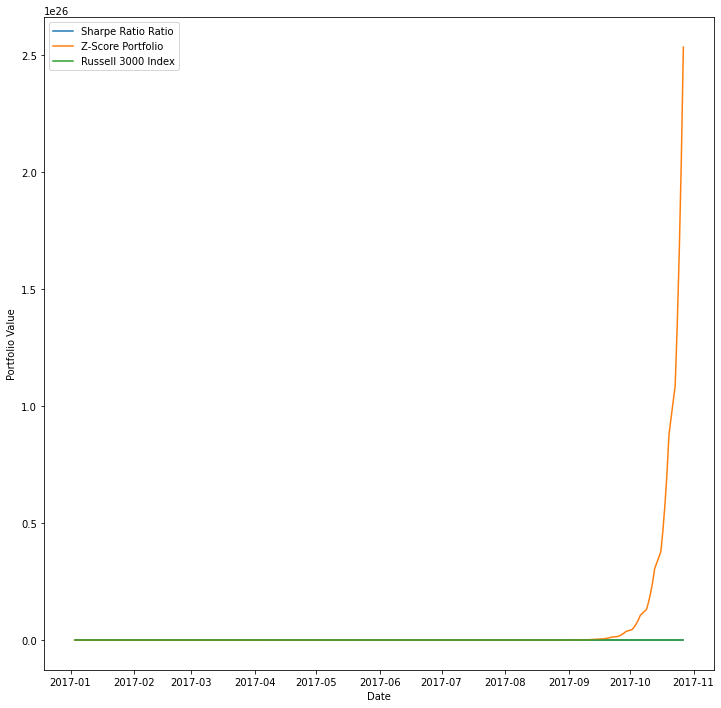

In [35]:
x = dates[1258:]
plt.plot(x, returns1, label="Sharpe Ratio Ratio")
plt.plot(x, returns2, label="Z-Score Portfolio")
plt.plot(x, returns3, label="Russell 3000 Index")
plt.ylabel("Portfolio Value")
plt.xlabel("Date")
plt.legend()
plt.show()